# Heart Disease Prediction¶
In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Loading Dataset
Now I will load the dataset which I have stored in the local directory with the name 'heart.csv'.

In [2]:
#loading dataset
data = pd.read_csv("heart.csv")

## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
print('\nTarget wise distribution of dataset:')
print(data.groupby('target').size())


Target wise distribution of dataset:
target
0    138
1    165
dtype: int64


In [5]:
print('\nStatistics of dataset: ')
data.describe()


Statistics of dataset: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Visualization
In order to understand the data, I will be using data visualization techniques like histograms, scatter plot matrix and bar graph.

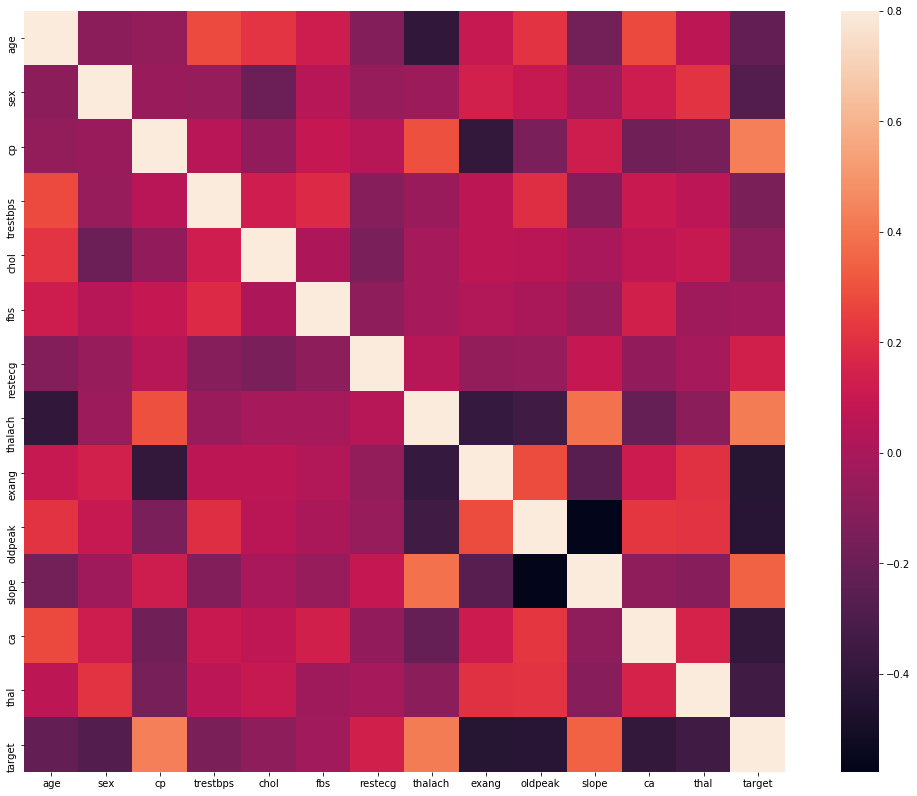

In [6]:
#Scatter Plot matrix
cor = data.corr()
fig = plt.figure(figsize=(20,14))
sns.heatmap(cor, vmax=0.8, square = True)

Taking a look at the correlation matrix above, we can conclude that a few features have negative correlation with the target value while some have positive. Next, I'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A1BB89C88>,
      dtype=object)

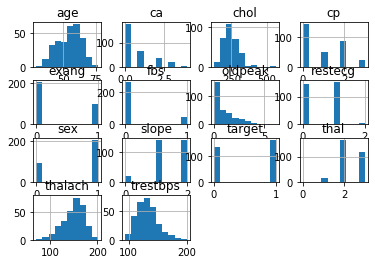

In [7]:
data.hist()

As we can see from the histograms above that different features have different range of distribution which indicates a need of applying feature scaling on the dataset.

Text(0.5, 0, 'Target')

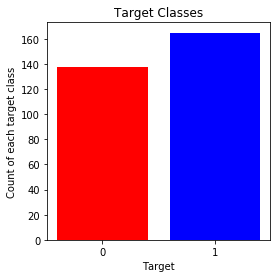

In [8]:
rcParams['figure.figsize'] = 4, 4
plt.bar(data['target'].unique(), data['target'].value_counts(), color=['blue', 'red'])
plt.xticks([0,1])
plt.title('Target Classes')
plt.ylabel('Count of each target class')
plt.xlabel('Target')

As the sizes of both the target classes are approximately equal there is no need to increasing/dropping data from the dataset.

## Data Processing
As concluded from the various data visualization techniques, there is a need to scale the data. So, I will be applying feature scaling to the dataset using StandardScaler from sklearn.

In [9]:
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
scaler = StandardScaler()
columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns] = scaler.fit_transform(data[columns])
data.shape

(303, 31)

The data is now ready for the application of various machine learning models.

## Machine Learning Models

In [10]:
#Splitting the dataset into training data and testing data
y = data['target']
X = data.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#### K-Neighbor Classifier
The accuracy of the algorithm depends on the number of neighbors that we choose. In order to achieve the best accuracy score I will plot a graph between different values of K(neighbors) vs the accuracy score.

In [11]:
knn_scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test, y_test))

Text(0.5, 1.0, 'K-Neighbor Classifier scores for different values of K')

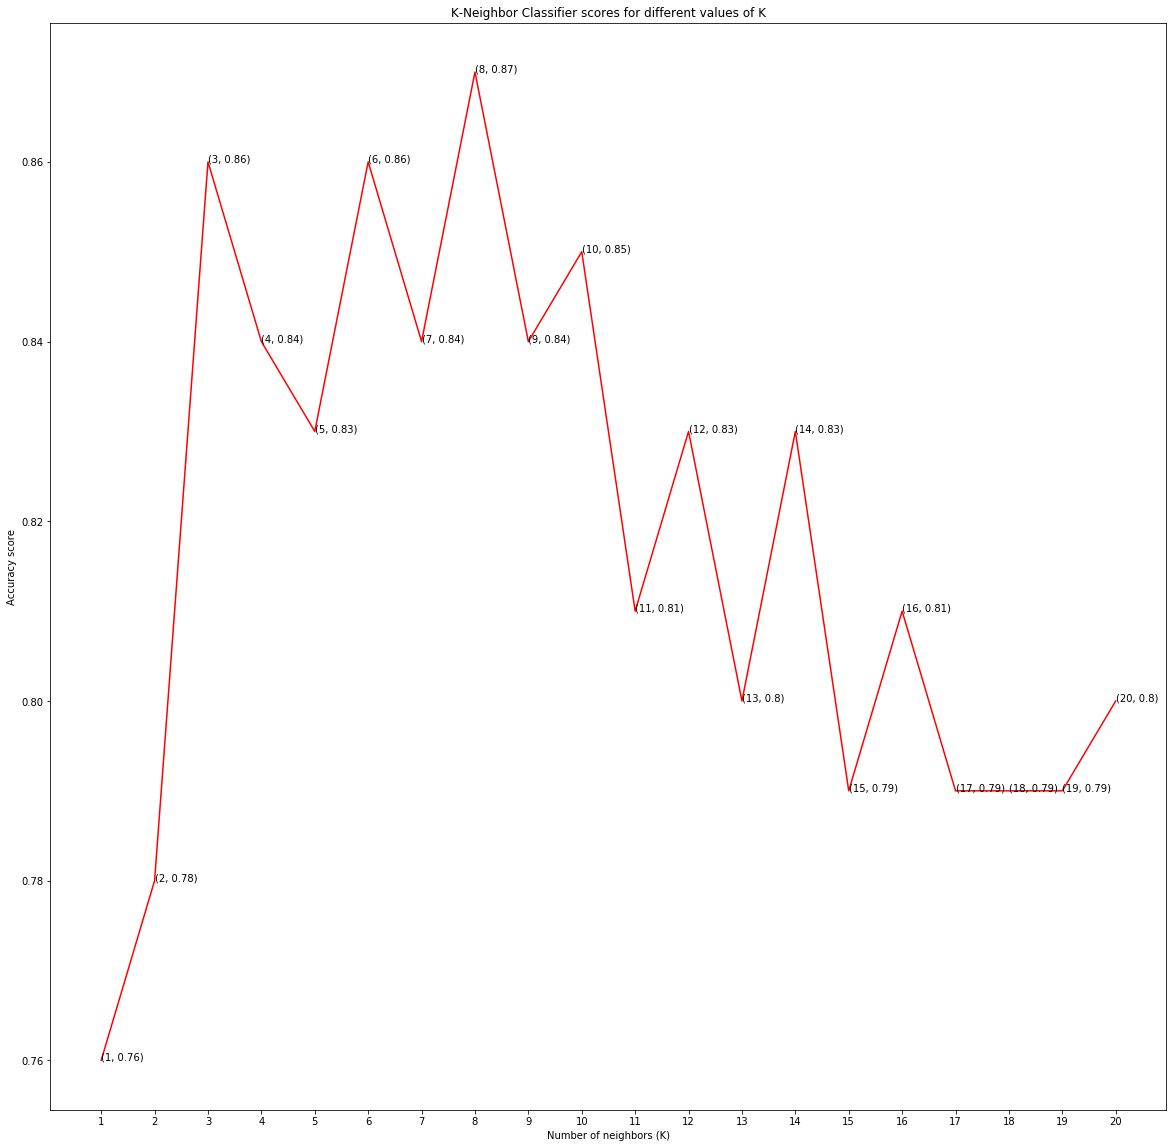

In [12]:
#Plotting the grapgh between different values of K(neighbors) vs the accuracy score
plt.figure(figsize=(20, 20))
plt.plot([k for k in range(1,21)], knn_scores, color='red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of neighbors (K)')
plt.ylabel('Accuracy score')
plt.title('K-Neighbor Classifier scores for different values of K')

From the above graph, it can be seen that maximum score of 0.867 is achieved for K=9.

In [13]:
print("The score for K-Neighbors Classifier is %f with {} neighbors.".format(8) %(knn_scores[7]*100))

The score for K-Neighbors Classifier is 87.000000 with 8 neighbors.


#### Support Vector Classifier 
Several kernels can be used to classify data in Support Vector Classifier.

In [14]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc = SVC(kernel = kernels[i])
    svc.fit(X_train, y_train)
    svc_scores.append(svc.score(X_test, y_test))
    

Text(0, 0.5, 'Accuracy score')

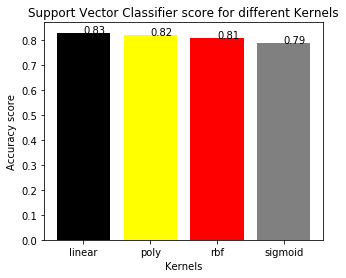

In [15]:
#Plotting the bar grapgh for Support Vector Classifier scores for different kernels
plt.figure(figsize=(5,4))
plt.bar(kernels, svc_scores, color=['black', 'yellow', 'red', 'grey'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], (svc_scores[i]))
plt.title('Support Vector Classifier score for different Kernels')
plt.xlabel('Kernels')
plt.ylabel('Accuracy score')

The linear kernel achieved the best accuracy score.

In [16]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


#### Random Forest Classifier
Now, I will vary the estimators in Random Forest Classifier to achieve the best accuracy score. 

In [17]:
rf_scores = []
estimators = [1, 10, 50 ,100, 500, 1000, 5000]
for i in range(len(estimators)):
    rf = RandomForestClassifier(n_estimators = estimators[i], random_state=0)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))

([<matplotlib.axis.XTick at 0x13a1c65ba08>,
 <a list of 1 Text xticklabel objects>)

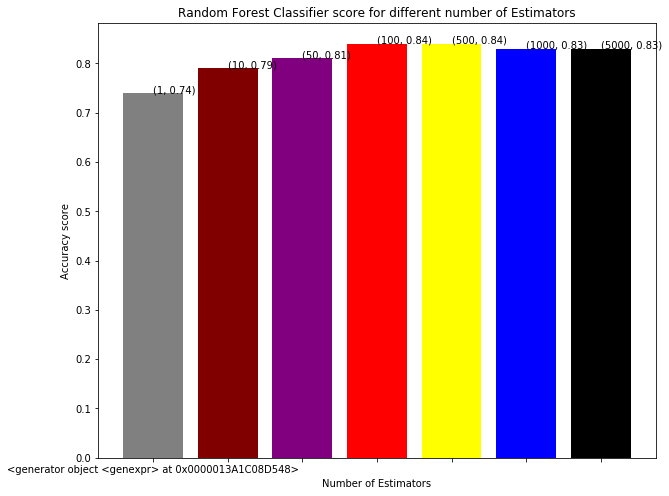

In [18]:
plt.figure(figsize=(10,8))
plt.bar([i for i in range(len(estimators))], rf_scores, color=['grey', 'maroon', 'purple', 'red', 'yellow', 'blue', 'black'], width=0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], (estimators[i],rf_scores[i]))
plt.title('Random Forest Classifier score for different number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy score')
plt.xticks([i for i in range(len(estimators))], labels=[str(estimators[i] for i in estimators)])

The best accuracy score is achieved when number of estimators are 100 or 500.

In [19]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[3]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


In [20]:
print("The score for K-Neighbors Classifier is %f with {} neighbors.".format(8) %(knn_scores[7]*100))
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[3]*100, [100, 500]))

The score for K-Neighbors Classifier is 87.000000 with 8 neighbors.
The score for Support Vector Classifier is 83.0% with linear kernel.
The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


## Conclusion
In this project, I applied machine learning models to predict whether a person is suffering from heart disease or not. After importing the data, I used data visualization techniques for data exploration. Then, I scaled features other than categorical features by creating their dummy variables. Later, I applied 3 machine learning models namely K-Neighbor Classifier, Support Vector Classifer and Random Forest Classifier. I varied parameters in each model to achieve best scores. Finally, K-Neighbor Clssifier model achieved the highest accuracy score of 87% with 8 nearest neighbors.

In [21]:
final_model = KNeighborsClassifier(n_neighbors = 8)
final_model.fit(X_train, y_train)
final_model_accuracy = final_model.score(X_test, y_test)
print(f"Model Accuracy: {final_model_accuracy*100} %")

Model Accuracy: 87.0 %


#### Predictor Function
Creating a function that will later be used to predict whether a person is suffering from heart disease or not using K-Neighbors Classifier model with 8 neighbors.

In [22]:
def predict_now(lis):
    lis = pd.DataFrame(lis)
    lis = pd.get_dummies(lis, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
    lis = lis.reindex(columns = X_train.columns, fill_value=0)
    scale = StandardScaler()
    column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    lis[column] = scale.fit_transform(lis[column])
    return final_model.predict(lis).item()

#lis = {'age': [63], 'sex': [0], 'cp': [0], 'trestbps': [34], 'chol': [334], 'fbs': [1], 'restecg': [0], 'thalach': [44], 'exang': [1], 'oldpeak': [55.0], 'slope': [1], 'ca': [1], 'thal': [6]}
#predict_now(lis)

## Heart Disease Predictor Application
In order to use the above created machine learning model to predict whether a person is likely to suffer from a heart disease or not, we need to build a Graphical User Interface (GUI) wherein the user can enter the required data and get a prediction. I have done this using tkinter GUI of python.

#### Importing Libraries

In [23]:
import tkinter as tk
from tkinter import ttk 

#### Defining Required Functions


In [24]:
def submit(*args):
    try:
        final = {
            'age': [int(user1.get())], 
            'sex': [int(user2.get())], 
            'cp': [int(user3.get())], 
            'trestbps': [int(user4.get())],
            'chol': [int(user5.get())],
            'fbs': [int(user6.get())],
            'restecg': [int(user7.get())],
            'thalach': [int(user8.get())],
            'exang': [int(user9.get())],
            'oldpeak': [float(user10.get())],
            'slope': [int(user11.get())],
            'ca': [int(user12.get())],
            'thal': [int(user13.get())]
            }
        result = predict_now(final)
        if result==1:
            this.set("Be careful, you are likely to have a heart disease.")
        else:
            this.set("Congratulations! You are unlikely to have a heart disease.")
    except ValueError:
        pass

#### Setting Up the Window

In [25]:
try:
    from ctypes import windll
    windll.shcore.SetProcessDPIAwareness(1)
except:
    pass

root = tk.Tk()
root.title("Heart Disease Predictor")

user1 = tk.StringVar()
user2 = tk.StringVar()
user3 = tk.StringVar()
user4 = tk.StringVar()
user5 = tk.StringVar()
user6 = tk.StringVar()
user7 = tk.StringVar()
user8 = tk.StringVar()
user9 = tk.StringVar()
user10 = tk.StringVar()
user11 = tk.StringVar()
user12 = tk.StringVar()
user13 = tk.StringVar()
this = tk.StringVar(value = "Submit to get the result.")

main = ttk.Frame(root, padding = (30, 10))
main.grid()


#### Declaring Widgets

In [26]:
label1 = ttk.Label(main, text = "Enter the following details: ")
label1.configure(font=("helvetica", 15))
label1.grid(row = 0, column = 0, sticky = "w")

entry1 = ttk.Label(main, text = "Age: ")
user_input1 = ttk.Entry(main, width = 15, textvariable = user1)

entry2 = ttk.Label(main, text = "Sex: ")
user_input21 = ttk.Radiobutton(main, text = "Male", variable = user2, value = 1)
user_input22 = ttk.Radiobutton(main, text = "Female", variable = user2, value = 0)

entry3 = ttk.Label(main, text = "Chest pain type: ")
user_input31 = ttk.Radiobutton(main, text = "0", variable = user3, value = 0)
user_input32 = ttk.Radiobutton(main, text = "1", variable = user3, value = 1)
user_input33 = ttk.Radiobutton(main, text = "2", variable = user3, value = 2)
user_input34 = ttk.Radiobutton(main, text = "3", variable = user3, value = 3)

entry4 = ttk.Label(main, text = "Resting blood pressure (in mm Hg): ")
user_input4 = ttk.Entry(main, width = 10, textvariable = user4)

entry5 = ttk.Label(main, text = "Serum cholestoral (in mg/dl): ")
user_input5 = ttk.Entry(main, width = 10, textvariable = user5)

entry6 = ttk.Label(main, text = "Fasting blood sugar > 120 mg/dl: ")
user_input61 = ttk.Radiobutton(main, text = "True", variable = user6, value = 1)
user_input62 = ttk.Radiobutton(main, text = "False", variable = user6, value = 0)

entry7 = ttk.Label(main, text = "Resting electrocardiographic results: ")
user_input71 = ttk.Radiobutton(main, text = "0", variable = user7, value = 0)
user_input72 = ttk.Radiobutton(main, text = "1", variable = user7, value = 1)
user_input73 = ttk.Radiobutton(main, text = "2", variable = user7, value = 2)

entry8 = ttk.Label(main, text = "Maximum heart rate achieved: ")
user_input8 = ttk.Entry(main, width = 10, textvariable = user8)

entry9 = ttk.Label(main, text = "Exercise induced angina: ")
user_input91 = ttk.Radiobutton(main, text = "Yes", variable = user9, value = 1)
user_input92 = ttk.Radiobutton(main, text = "No", variable = user9, value = 0)

entry10 = ttk.Label(main, text = "ST depression induced by exercise relative to rest: ")
user_input10 = ttk.Entry(main, width = 10, textvariable = user10)

entry11 = ttk.Label(main, text = "Slope of the peak exercise ST segment: ")
user_input111 = ttk.Radiobutton(main, text = "0", variable = user11, value = 0)
user_input112 = ttk.Radiobutton(main, text = "1", variable = user11, value = 1)
user_input113 = ttk.Radiobutton(main, text = "2", variable = user11, value = 2)

entry12 = ttk.Label(main, text = "Number of major vessels (0-3) colored by flourosopy: ")
user_input121 = ttk.Radiobutton(main, text = "0", variable = user12, value = 0)
user_input122 = ttk.Radiobutton(main, text = "1", variable = user12, value = 1)
user_input123 = ttk.Radiobutton(main, text = "2", variable = user12, value = 2)
user_input124 = ttk.Radiobutton(main, text = "3", variable = user12, value = 3)

entry13 = ttk.Label(main, text = "Thal: ")
user_input131 = ttk.Radiobutton(main, text = "0", variable = user13, value = 0)
user_input132 = ttk.Radiobutton(main, text = "1", variable = user13, value = 1)
user_input133 = ttk.Radiobutton(main, text = "2", variable = user13, value = 2)
user_input134 = ttk.Radiobutton(main, text = "3", variable = user13, value = 3)

button = ttk.Button(main, text = "Submit", command = submit)

out = ttk.Label(main, textvariable = this)

#### Displaying the Widgets

In [27]:
main.columnconfigure(1, weight = 1)
main.columnconfigure(2, weight = 1)
main.columnconfigure(3, weight = 1)
main.columnconfigure(4, weight = 1)

entry1.grid(row = 1, column = 0, sticky = "w", padx = 10, pady = 10)
user_input1.grid(row = 1, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)
user_input1.focus()

entry2.grid(row = 2, column = 0, sticky = "w", padx = 10, pady = 10)
user_input21.grid(row = 2, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input22.grid(row = 2, column = 2, sticky = "ew", padx = 10, pady = 10)

entry3.grid(row = 3, column = 0, sticky = "w", padx = 10, pady = 10)
user_input31.grid(row = 3, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input32.grid(row = 3, column = 2, sticky = "ew", padx = 10, pady = 10)
user_input33.grid(row = 3, column = 3, sticky = "ew", padx = 10, pady = 10)
user_input34.grid(row = 3, column = 4, sticky = "ew", padx = 10, pady = 10)

entry4.grid(row = 4, column = 0, sticky = "w", padx = 10, pady = 10)
user_input4.grid(row = 4, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)

entry5.grid(row = 5, column = 0, sticky = "w", padx = 10, pady = 10)
user_input5.grid(row = 5, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)

entry6.grid(row = 6, column = 0, sticky = "w", padx = 10, pady = 10)
user_input61.grid(row = 6, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input62.grid(row = 6, column = 2, sticky = "ew", padx = 10, pady = 10)

entry7.grid(row = 7, column = 0, sticky = "w", padx = 10, pady = 10)
user_input71.grid(row = 7, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input72.grid(row = 7, column = 2, sticky = "ew", padx = 10, pady = 10)
user_input73.grid(row = 7, column = 3, sticky = "ew", padx = 10, pady = 10)

entry8.grid(row = 8, column = 0, sticky = "w", padx = 10, pady = 10)
user_input8.grid(row = 8, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)

entry9.grid(row = 9, column = 0, sticky = "w", padx = 10, pady = 10)
user_input91.grid(row = 9, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input92.grid(row = 9, column = 2, sticky = "ew", padx = 10, pady = 10)

entry10.grid(row = 10, column = 0, sticky = "w", padx = 10, pady = 10)
user_input10.grid(row = 10, column = 1, sticky = "ew", padx = 10, pady = 10, columnspan = 4)

entry11.grid(row = 11, column = 0, sticky = "w", padx = 10, pady = 10)
user_input111.grid(row = 11, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input112.grid(row = 11, column = 2, sticky = "ew", padx = 10, pady = 10)
user_input113.grid(row = 11, column = 3, sticky = "ew", padx = 10, pady = 10)

entry12.grid(row = 12, column = 0, sticky = "w", padx = 10, pady = 10)
user_input121.grid(row = 12, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input122.grid(row = 12, column = 2, sticky = "ew", padx = 10, pady = 10)
user_input123.grid(row = 12, column = 3, sticky = "ew", padx = 10, pady = 10)
user_input124.grid(row = 12, column = 4, sticky = "ew", padx = 10, pady = 10)

entry13.grid(row = 13, column = 0, sticky = "w", padx = 10, pady = 10)
user_input131.grid(row = 13, column = 1, sticky = "ew", padx = 10, pady = 10)
user_input132.grid(row = 13, column = 2, sticky = "ew", padx = 10, pady = 10)
user_input133.grid(row = 13, column = 3, sticky = "ew", padx = 10, pady = 10)
user_input134.grid(row = 13, column = 4, sticky = "ew", padx = 10, pady = 10)

button.grid(row = 14, column = 0, columnspan = 5, sticky = "ew", padx = 10, pady = 10)

out.grid(row = 15, column = 0, columnspan = 5)

root.mainloop()